In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, exp, log10


In [2]:
np.random.seed(31415)

In [3]:
def post_mc_conv(y, x, zeta, omega):
    return exp(-0.5*(y -x)*(y -x)/zeta)*exp(-0.5*x*x/omega)/sqrt(2*np.pi*zeta)/sqrt(2*np.pi*omega)

In [22]:
num_grid_points = 100
num_contour_lines = 10
x_min = -1
x_max = 10
log_omega_min = -3
log_omega_max = 1
xs = np.linspace(x_min, x_max, num_grid_points)
omegas = np.logspace(log_omega_min, log_omega_max, num_grid_points)
X, O = np.meshgrid(xs, omegas)
probs = np.zeros(X.shape)

In [47]:
zeta_fid = 1.
omega_fid = 1e-3
y_i = np.random.normal(loc=0, scale=(zeta_fid + omega_fid))
print('y_i = ', y_i)

y_i =  1.1352422918140632


In [48]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        probs[i,j] = post_mc_conv(y_i, X[i,j], zeta_fid, O[i,j])

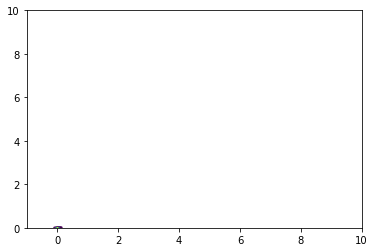

In [49]:
plt.contour(X, O, probs)

# change of variables

In [50]:
def post_mc_conv_change_of_vars(y, x, zeta, omega):
    # s = x/sqrt(omega)
    # nu = log(e^omega - 1)
    # p(omega) = 1/omega
    # |J| = sqrt(w)(1-e^-omega)
    return exp(-0.5*(y -x)*(y -x)/zeta)*exp(-0.5*x*x/omega)/sqrt(2*np.pi*zeta)/sqrt(2*np.pi*omega) \
        *sqrt(omega)*(1. - exp(-omega))/(omega+zeta)

In [51]:
zeta_fid = 1.
omega_fid = 1.
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        probs[i,j] = post_mc_conv_change_of_vars(y_i, X[i,j], zeta_fid, O[i,j])

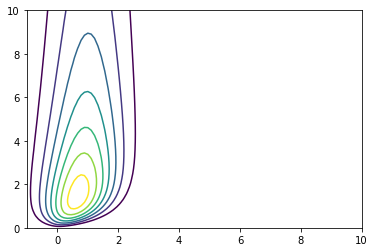

In [52]:
plt.contour(X, O, probs)